# Одномерная минимизация и скорость сходимости

## Теория

### 1
Определить скорость сходимости следующих последовательностей:

1. $r_k = \left\{ (0.707)^k \right\}_{k=1}^\infty$
2. $r_k = \left\{ (0.707)^{2^k} \right\}_{k=1}^\infty$
3. $r_k = \left\{ \dfrac{1}{k^2} \right\}_{k=1}^\infty$
4. $r_k = \left\{ \dfrac{1}{k!} \right\}_{k=1}^\infty$
5. $r_k =\begin{cases} \frac{1}{k}, & \mbox{if } k\mbox{ is even} \\ \frac{1}{k^2}, & \mbox{if } k\mbox{ is odd} \end{cases}$
6. $r_k =\begin{cases} \frac{1}{k^k}, & \mbox{if } k\mbox{ is even} \\ \frac{1}{k^{2k}}, & \mbox{if } k\mbox{ is odd} \end{cases}$

1. $\alpha \equiv \dfrac{r_{k+1}}{r_k} \equiv 0.707 \Rightarrow $ последовательность сходится линейно с константой $0.707$

2. $\alpha \equiv r_k^{1/k} = 0.707^2 \approx 0.499\Rightarrow $ последовательность сходится линейно с константой 0.5

3. $\dfrac{r_{k+1}}{r_k} = \dfrac{k^2}{k^2+2k+1} < 1. ~\lim_{k \rightarrow \infty}\inf \dfrac{r_{k+1}}{r_k}=\lim_{k \rightarrow \infty}\dfrac{r_{k+1}}{r_k}  = 1 \Rightarrow$ последовательность сходится сублинейно

4. $\dfrac{r_{k+1}}{r_k} = \dfrac{1}{k+1}.~\lim \dfrac{r_{k+1}}{r_k} = 0 \Rightarrow$ последовательность сходится сверхлинейно

5. $\dfrac{r_{k+1}}{r_k} = \begin{cases} \frac{k}{(k+1)^2}, & \mbox{if } k\mbox{ is even} \\ \frac{k^2}{k+1}, & \mbox{if } k\mbox{ is odd} \end{cases}\\
   \alpha = lim_{k \rightarrow \infty}\dfrac{r_{k+1}}{r_k} ~не ~существует\\
    получаем ~случай~ \lim_{k \to \infty} \inf \dfrac{r_{k+1}}{r_k} \lt  1 \leq  \lim_{k \to \infty} \sup \dfrac{r_{k+1}}{r_k}$
    
    нельзя утверждать что-то о сходимости.

6. $r_{2k}^{1/2k} = \dfrac{1}{2k}, ~r_{2k+1}^{1/{(2k+1)}} = \dfrac{1}{{(2k+1)}^2}. 
    \\ \frac{1}{(k+1)^2} <\sup_{n\ge k} r_k^{1/k} < 1/k.
    \\\lim_{n \rightarrow \infty}\sup_{n\ge k} r_k^{1/k} = 0 \Rightarrow $ 
    
    последовательность сходится сверхлинейно

### 2
Рассмотрите функцию $f(x) = x \cdot e^x + \sin e^x, \;\;\; x \in [-5, 0]$ . Рассмотрите методы локализации решения, при которых отрезок делится на 2 части в фиксированной пропорции $t: x_t = a + t*(b-a)$.

* Проведите эксперименты при различных значениях $t \in [0,1]$ и постройте график зависимости $\overline{N} (t)$ - среднего значения количества итераций, необходимых для достижения $\varepsilon$ - точности от параметра $t$. (Для каждого значения $t$ провести не менее 5 запусков).</li>
* Попробуйте на каждом шаге выбирать точку так, чтобы $t$ было распределено равномерно от $0$ до $1$. Постройте график зависимости среднего (по экспериментам) значения функции от итерации. Помимо среднего отложите на графике так же разброс, соответствующий стандартному отклонению. Провести не менее 33 экспериментов. Сравните результаты по среднему количеству итераций с первым пунктом.</li>

Считать $\varepsilon = 10^{-7}$.

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Text(0.5,1,'Objective function')

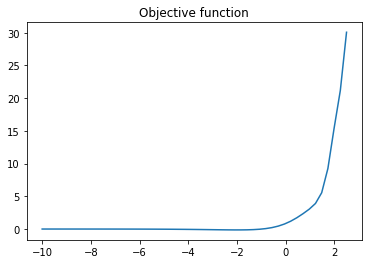

In [97]:
# Target unimodal function on given segment
f = lambda x: x*np.exp(x)+np.sin(np.exp(x)) 

a = -10
b = 2.5
epsilon = 1e-7
#x_opt = binary_search(f, a, b, epsilon, callback_bs)

plt.plot(np.linspace(a,b), f(np.linspace(a,b)))
plt.title("Objective function")

### Part one

In [43]:
def binary_search(f, a, b, epsilon, t=0.5):
    c = a + t * (b - a)
    k = 0
    while max(abs(b - c),abs(c - a)) > epsilon:
        k = k + 1
        y = a + t * (c - a)
        if f(y) <= f(c):
            b = c
            c = y
        else:
            z = c + t * (b - c)
            if f(c) <= f(z):
                a = y
                b = z
            else:
                a = c
                c = z
    return c, k

Text(0.5,1,'Mean number of iterations')

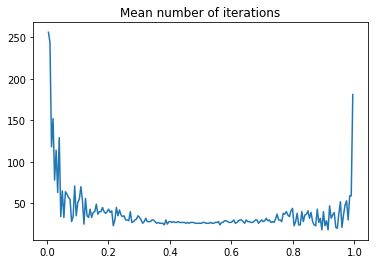

In [44]:
t_list = np.linspace(0, 1, 200)[1:-1]
N_list = []
for t in t_list:
    temp = []
    for i in range(5):
        _, k = binary_search(f, a, b, epsilon, t)
        temp.append(k)
    N_list.append(np.mean(temp))
plt.plot(t_list, N_list)
plt.title("Mean number of iterations")

In [124]:
N_list[100]

27.0

### Part two

In [119]:
def stoch_binary_search(f, a, b, epsilon):
    val = []
    t = np.random.rand()
    c = a + t * (b - a)
    k = 0
    val.append(f(c))
    while max(abs(b - c),abs(c - a)) > epsilon:
        k = k + 1
        t = np.random.rand()
        y = a + t * (c - a)
        if f(y) <= f(c):
            b = c
            c = y
        else:
            z = c + t * (b - c)
            if f(c) <= f(z):
                a = y
                b = z
            else:
                a = c
                c = z
        val.append(f(c))
    return c, k, val

Text(0,0.5,'Function value')

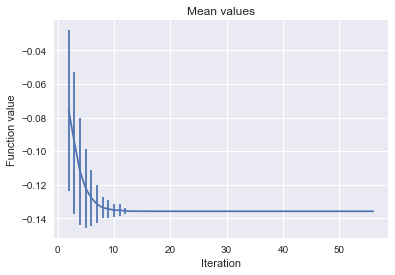

In [121]:
means = []
stds = []
iter_val = {}
num_iter = []
for i in range(200):
    _, k, val = stoch_binary_search(f, a, b, epsilon)
    num_iter.append(k)
    for i in range(len(val)):
        if i not in iter_val.keys():
            iter_val[i] = []
        iter_val[i].append(val[i])
for i in iter_val.keys():
    means.append(np.mean(iter_val[i]))
    stds.append(np.std(iter_val[i]))
plt.errorbar(range(2,len(means)), means[2:], yerr=stds[2:])
plt.title("Mean values")
plt.xlabel("Iteration")
plt.ylabel("Function value")

In [122]:
np.mean(num_iter)

37.65

## Практика

### 3
Напишите функцию `dichotomy()`, которая решает задачу минимизации одномерной функции $f(x)=ax^2+b⋅x+c$  при условии, что $x_1\leq x \leq x_2$,$x_1 < x_2$ с помощью метода дихотомии с $\varepsilon$ точностью относительно размера локализуемого отрезка. Функция возвращает массив из 5 последних итераций в формате np.array.

In [128]:
import numpy as np
def dichotomy(a,b,c,x1,x2, epsilon):
    f = lambda x: a*x**2 + b*x + c
    vals = []
    x3 = (x1 + x2) / 2
    val.append(f(x3))
    while abs(x2 - x1) > epsilon:
        y = (x1 + x3) / 2.0
        if f(y) <= f(x3):
            x2 = x3
            x3 = y
        else:
            z = (x2 + x3) / 2.0
            if f(x3) <= f(z):
                x1 = y
                x2 = z
            else:
                x1 = x3
                x3 = z
        val.append(f(x3))
    array_of_5_last_iterations = np.array(val[-5:])
    #raise NotImplementedError()
    return array_of_5_last_iterations

In [134]:
dichotomy(400, -214, 13, 0, 0.5, 1e-7)

array([-15.6225, -15.6225, -15.6225, -15.6225, -15.6225])

### 4
Напишите функцию `fibonacci()`, которая решает задачу минимизации одномерной функции $f(x)=ax^2+b⋅x+c$  при условии, что $x_1\leq x \leq x_2$,$x_1 < x_2$ с помощью метода Фибоначчи с $\varepsilon$ точностью относительно размера локализуемого отрезка. Функция возвращает массив из 5 последних итераций в формате np.array.

In [139]:
import numpy as np
def fibonacci(a,b,c,x1,x2, epsilon):
    f = lambda x: a*x**2 + b*x + c
    maj = (x2 - x1) / epsilon
    fib_num = [1, 1]
    while maj > fib_num[-1]:
        fib_num.append(fib_num[-1]+fib_num[-2])
    lam = x1 + (x2 - x1) * fib_num[-3] / fib_num[-1]
    mu = x1 + (x2 - x1) * fib_num[-2] / fib_num[-1]
    vals = []
    val1 = f(lam)
    val2 = f(mu)
    for k in range(1, len(fib_num) - 2):
        if val1 > val2:
            x1 = lam
            x2 = x2
            lam = mu
            mu = x1 + (x2 - x1) * fib_num[-2 - k] / fib_num[-1 - k]
            val1 = val2
            val2 = f(mu)
            vals.append(val2)
        else:
            x1 = x1
            x2 = mu
            mu = lam
            lam = x1 + (x2 - x1) * fib_num[-3 - k] / fib_num[-1 - k]
            val2 = val1
            val1 = f(lam)
            vals.append(val1)
    #raise NotImplementedError()
    array_of_5_last_iterations = np.array(vals[-5:])
    return array_of_5_last_iterations

In [140]:
fibonacci(400, -214, 13, 0, 0.5, 1e-7)

array([-15.6225, -15.6225, -15.6225, -15.6225, -15.6225])